# Carbon-negative oleochemical production through green hydrogen


![flowsheet](H2_CO2_to_oleochemicals.svg)

The open-source biorefineries library includes over 20 biorefinery configurations. These are packaged as ProcessModel or Biorefinery objects, from which you can access every component of the model. 

In [1]:
import biosteam as bst
from biorefineries.gas_fermentation import Biorefinery
bst.nbtutorial()
br = Biorefinery()
br

Biorefinery(
    name='all fermentation|glucose growth',
    product='Dodecanol',
    carbon_capture=False,
    dewatering=False,
    glucose_growth=True,
    carbon_source='BFG',
    biomass='cornstover',
    hydrogen_price='min',
    fermentation_performance='all',
)


Let's have a look at the diagram.

In [2]:
br.system.show()

System: acetyl_ester_sys
Highest convergence error among components in recycle
stream C1-1 after 1 loops:
- flow rate   3.94e-01 kmol/hr (0.0015%)
- temperature 0.00e+00 K (0%)
ins...
[0] hydrogen  
    phase: 'g', T: 298.15 K, P: 1.01325e+06 Pa
    flow (kmol/hr): H2  1.68e+03
[1] flue_gas  
    phase: 'g', T: 298.15 K, P: 101325 Pa
    flow (kmol/hr): N2   447
                    CO   208
                    H2   40.6
                    CO2  209
outs...
[0] product  
    phase: 'l', T: 319.14 K, P: 202650 Pa
    flow (kmol/hr): Water       4.8e-05
                    AceticAcid  5.94e-10
                    Dodecanol   34.5
                    Hexane      0.0867
                    Glucose     1.95e-08


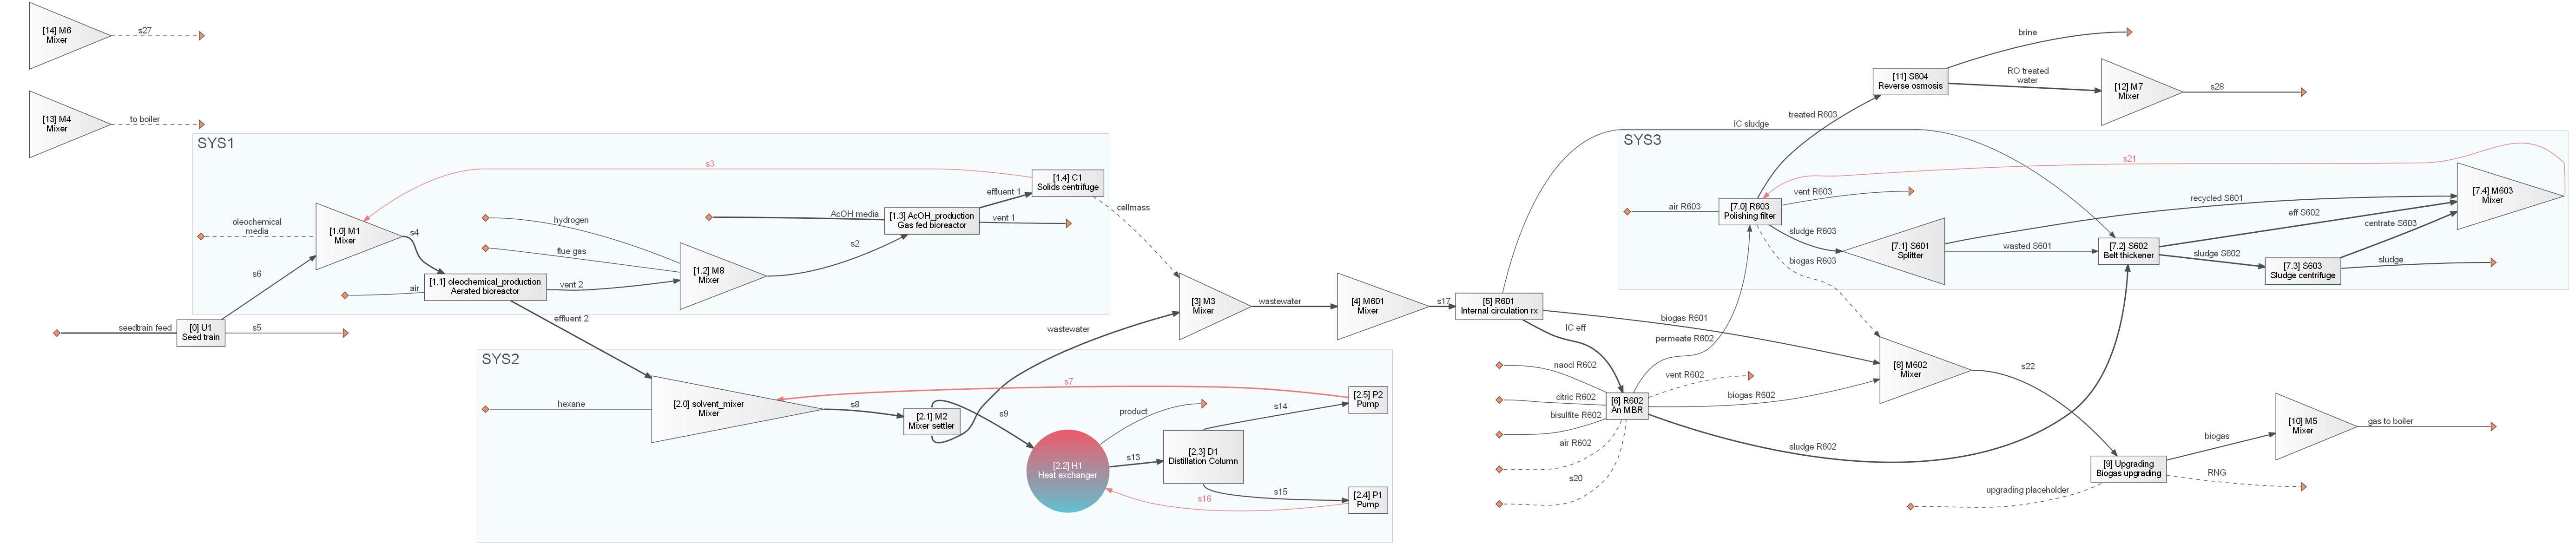

In [3]:
br.system.diagram(format='png', kind='cluster', number=True, facilities=False)

Every unit operation and stream are available as attributes in the model:

In [4]:
br.oleochemical_production.show()

AeratedBioreactor: oleochemical_production
ins...
[0] s4  from  Mixer-M1
    phase: 'l', T: 310.15 K, P: 101325 Pa
    flow (kmol/hr): Water       3.99e+04
                    AceticAcid  478
                    Yeast       563
                    Glucose     43.3
[1] air  
    phase: 'g', T: 310.15 K, P: 101325 Pa
    flow (kmol/hr): N2  1.53e+03
                    O2  407
outs...
[0] vent_2  to  Mixer-M8
    phase: 'g', T: 310.15 K, P: 101325 Pa
    flow (kmol/hr): Water       124
                    N2          1.53e+03
                    O2          72.4
                    CO2         541
                    AceticAcid  3.28e-07
[1] effluent_2  to  Mixer-solvent_mixer
    phase: 'l', T: 310.15 K, P: 101325 Pa
    flow (kmol/hr): Water       4.03e+04
                    AceticAcid  0.000167
                    Yeast       563
                    Dodecanol   34.5
                    Glucose     43.3


In [5]:
br.oleochemical_production.results(include_installed_cost=True, basis='SI')

Aerated bioreactor                                              Units oleochemical_production
Electricity              Power                                     kW                1.31e+04
                         Cost                                  USD/hr                     784
Cooling water            Duty                                   kJ/hr               -1.56e+08
                         Flow                                 kmol/hr                1.78e+05
                         Cost                                  USD/hr                    86.6
Design                   Reactor volume                            m³                 3.7e+03
                         Batch time                                hr                    15.6
                         Loading time                              hr                     3.9
                         Residence time                            hr                    8.69
                         Vessel type                                                 Vertical
                         Length                                     m                    87.9
                         Diameter                                   m                    7.32
                         Weight                                    kg                2.07e+05
                         Wall thickness                             m                  0.0118
                         Vessel material                                  Stainless steel 316
Purchase cost            Vertical pressure vessel (x4)            USD                8.12e+06
                         Platform and ladders (x4)                USD                1.36e+06
                         Compressor - Compressor(s) (x4)          USD                4.34e+06
                         Air cooler - Floating head (x4)          USD                4.59e+04
                         Heat exchanger - Floating head (x4)      USD                1.65e+06
                         Recirculation pump - Pump (x4)           USD                1.03e+06
                         Recirculation pump - Motor (x4)          USD                 2.2e+04
                         Agitator - Agitator (x4)                 USD                1.99e+06
Total purchase cost                                               USD                1.86e+07
Installed equipment cost                                          USD                3.98e+07
Utility cost                                                   USD/hr                     871

The process model streamlines simulation, TEA, and LCA through parameters you can modify and system-wide metrics you can compute.

In [6]:
br.model

Model:
parameters: EtAc - Price [USD/kg]
            Hexane - Price [USD/kg]
            Glucose - Price [USD/kg]
            Oleochemical - Price [USD/kg]
            H2 - Price [USD/kg]
            AcOH production - Titer [g/L]
            AcOH production - Productivity [g/L/h]
            Oleochemical production - Titer [g/L]
            Oleochemical production - Productivity [g/L/h]
            Oleochemical production - Bioreactor yield [% theoretical]
            Oleochemical production - Specific yield [g_{Dodecanol}/g_{cell}]
            Flue gas - Processing capacity [MT/yr]
            Biomass - Price [USD/MT]
indicators: MSP [USD/kg]
            Carbon intensity [kg*CO2e/kg]
            TCI [10^6 USD]
            Product yield to biomass [wt %]
            Product yield to hydrogen [% theoretical]
            Biomass burned [10^3 MT/yr]
            Hydrogen consumption [10^3 MT/yr]
            Electricity demand [kWh/kg-H2]
            Oleochemical - Production capacity [MT/y

In [8]:
assumptions, outcomes = br.baseline()
assumptions

EtAc                    Price [USD/kg]                          1.57
hexane                  Price [USD/kg]                          0.73
glucose                 Price [USD/kg]                         0.413
oleochemical            Price [USD/kg]                             3
H2                      Price [USD/kg]                             3
AcOH production         Titer [g/L]                               60
                        Productivity [g/L/h]                     1.5
Oleochemical production Titer [g/L]                               30
                        Productivity [g/L/h]                       1
                        Bioreactor yield [% theoretical]          65
                        Specific yield [g_{Dodecanol}/g_...      0.7
Flue gas                Processing capacity [MT/yr]         2.32e+05
biomass                 Price [USD/MT]                          54.7

In [9]:
outcomes

-            MSP [USD/kg]                            4.69
             Carbon intensity [kg*CO2e/kg]           2.15
             TCI [10^6 USD]                           444
             Product yield to biomass [wt %]        0.486
             Product yield to hydrogen [% the...    0.267
             Biomass burned [10^3 MT/yr]              111
             Hydrogen consumption [10^3 MT/yr]       28.5
             Electricity demand [kWh/kg-H2]          5.38
oleochemical Production capacity [MT/yr]         5.41e+04

Get more detailed TEA information from the TEA object.

In [10]:
br.tea.CAPEX_table() # Capital expenditures

Notes  Cost [MM$]
Direct costs                   ISBL installed equipment cost                         151
                               OSBL installed equipment cost                        86.6
                               Warehouse                        4.0% of ISBL        6.06
                               Site development                 9.0% of ISBL        13.6
                               Additional piping                4.5% of ISBL        6.82
Total direct cost (TDC)                                                              265
Indirect costs                 Proratable costs                 10.0% of TDC        26.5
                               Field expenses                   10.0% of TDC        26.5
                               Construction                     20.0% of TDC        52.9
                               Contingency                      10.0% of TDC        26.5
                               Other (start-up, permits, etc.)  10.0% of TDC        26.5
Total indirect cost (TIC)                                                            159
Fixed capital investment (FCI)                                     TDC + TIC         423
Working capital (WC)                                             5.0% of FCI        21.2
Total capital investment (TCI)                                      FCI + WC         444

In [11]:
br.tea.VOC_table(br.product) # Variable operating costs

Price [$/MT] Cost [MM$/yr]
Raw materials           FGD lime                                 199        0.0315
                        Biomass                                 54.7          6.08
                        bisulfite R602                          79.9       0.00047
                        Boiler chemicals                       5e+03        0.0119
                        citric R602                              337       0.00521
                        Cooling tower chemicals                3e+03        0.0415
                        Hexane                                   730          3.77
                        Hydrogen                               3e+03          85.6
                        naocl R602                               140       0.00516
                        Seedtrain feed                          41.3            93
Cooling utilities       Cooling water            0.00048785 USD/kmol        0.0392
Other utilities & fees  Electricity                       0.06 $/kWh      3.67e-15
                        Fuel                                     218          2.88
Co-products & credits   Ash disposal                           -31.8       -0.0224
Variable operating cost                                            0           191

In [12]:
br.tea.FOC_table() # Fixed operating costs

,Notes,Cost [MM$ / yr]
Labor salary,,2.5
Labor burden,90% of labor salary,2.25
Maintenance,3.0% of ISBL,4.54
Property insurance,0.7% of ISBL,1.06


Get more detailed LCA information from the system object.

In [13]:
br.system.displacement_allocation_table('GWP', br.product)

Characterization factor [kg*CO2e/kg] GWP [kg*CO2e/kg*product]
Inputs                  Biomass                                             0.0382                    0.0785
                        Hexane                                                0.55                    0.0526
                        Hydrogen                                               1.8                     0.951
                        Seedtrain feed                                      0.0938                       3.9
Total inputs                                                                                            4.98
Outputs displaced       RNG                                                   3.13                         0
Total outputs displaced                                                                                    0
Process impacts         Credited carbon intake                                  -1                     -2.83
Total                                                                                                   2.15

In [ ]:
br.system.update_configuration()